In [2]:
from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet')

553467904/553467096 [==============================] - 251s 0us/step


In [5]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
img_path=r'C:\Users\박정은\OneDrive - 고려대학교\삽질\파이썬\elephant.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [6]:
preds=model.predict(x)
print('predicted: ',decode_predictions(preds,top=3)[0])

40960/35363 [==================================] - 0s 2us/step
predicted:  [('n02504458', 'African_elephant', 0.82743925), ('n01871265', 'tusker', 0.1593805), ('n02504013', 'Indian_elephant', 0.01310445)]


In [7]:
from keras import backend as K

In [15]:
african_elephant_output=model.output[:,386]
last_conv_layer=model.get_layer('block5_conv3')
grads=K.gradients(african_elephant_output,last_conv_layer.output)[0]
pooled_grads=K.mean(grads,axis=(0,1,2))
iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value,conv_layer_output_value=iterate([x])
for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
heatmap=np.mean(conv_layer_output_value,axis=-1)

In [16]:
import matplotlib.pyplot as plt

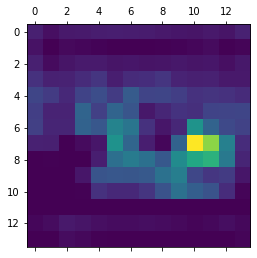

In [17]:
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [18]:
import cv2

ModuleNotFoundError: No module named 'cv2'